In [172]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
import math 
import random
import matplotlib.pyplot as plt
import re

przekonwertowanie plików testowych i treningowych z oddzielonych tabulatorami do csv. Pliki z informacjami o filmach, użytkownikach i ratingach zostały przekonwertowane i zapisane wcześniej

In [40]:
folder_path = Path('..','..','res','data','ml-100k')
files_list = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
tabulator_sep = [file for file in files_list if "base" in file or "test" in file]
#cross = tabulator_sep[:-4]

for index, filename in enumerate(tabulator_sep):
    new_filename = "_".join(filename.split(sep='.')) + ".csv"

    source_path = Path('..','..','res','data','ml-100k',filename)
    if index < len(tabulator_sep) - 4:
        target_path = Path('..','..','res','data','cross', new_filename)
    else:
         target_path = Path('..','..','res','data','train_test', new_filename)
    
    df = pd.read_csv(source_path, sep='\t', header=None)
    df.to_csv(target_path, index=False, header=False)
    

In [42]:
base = pd.read_csv(Path('..','..','res','data','cross','u1_base.csv'), header=None)
test = pd.read_csv(Path('..','..','res','data','cross','u1_test.csv'), header = None)
base.shape, test.shape

((80000, 4), (20000, 4))

In [51]:
base.columns = ['user_id', 'movie_id','rating','timestamp']
len(base['user_id'].unique())

943

In [106]:
test_org = pd.read_csv(Path('..','..','check','test_mtrx_org.csv'))
np.count_nonzero(test.values)

17941

In [98]:
def find_test_users_indices():
    """
    1. przerobic oceny na 1
    2. obliczyc ile ocen kazdy wystawił
    3. randomowo wybierac i dodawac do siebie elementy dopoki bedzie 20%
    4. zapisyawac indeksy i dodac do nich 1. jak wiecej ludzi ma ta sama wartosc
        to randomowo wybrac o kogo chodzi
    """
    ratings = pd.read_csv(Path('..','..','res','data','ratings.csv'))
    ratings = ratings.pivot(index='user_id',columns='movie_id',values='rating')
    ratings = ratings.fillna(0)
    ratings_np = ratings.to_numpy()
    array_binary = (ratings_np != 0).astype(int)
    actions_per_user = np.sum(array_binary, axis=1).tolist()
    
    number_of_ratings = 0
    users_indices = []
    while number_of_ratings < 2 * 10**4:
            choosen = random.choice(actions_per_user)
            indices = [index for index, value in enumerate(actions_per_user) if value == choosen]
            index = random.choice(indices) + 1 # +1 bo użytkownicy są numerowani od 1
            if number_of_ratings + choosen < 2.01 * 10**4 and index not in users_indices:
                number_of_ratings += choosen
                users_indices.append(index)
            else:
                number_of_ratings = number_of_ratings
            
    return np.sort(users_indices)

In [99]:
find_test_users_indices()

array([  1,   3,  17,  24,  33,  39,  41,  48,  55,  56,  60,  69,  73,
        77,  82,  83,  84,  92,  95, 103, 104, 116, 118, 120, 141, 144,
       147, 157, 166, 177, 180, 182, 186, 195, 203, 209, 212, 216, 217,
       218, 225, 240, 242, 245, 246, 252, 255, 258, 263, 264, 268, 277,
       278, 285, 286, 292, 297, 305, 310, 315, 319, 320, 322, 344, 345,
       347, 350, 354, 368, 383, 385, 393, 396, 398, 404, 408, 412, 417,
       423, 426, 429, 436, 437, 446, 449, 453, 455, 457, 461, 465, 472,
       478, 485, 486, 491, 492, 496, 498, 501, 503, 505, 511, 512, 524,
       525, 527, 528, 529, 559, 562, 567, 568, 570, 576, 580, 582, 583,
       585, 596, 600, 601, 612, 615, 620, 627, 630, 633, 640, 641, 642,
       643, 646, 652, 654, 657, 663, 667, 674, 676, 678, 680, 683, 686,
       688, 690, 708, 711, 734, 735, 736, 739, 742, 744, 745, 754, 755,
       763, 765, 773, 774, 778, 781, 783, 784, 794, 796, 797, 798, 801,
       802, 806, 816, 819, 827, 829, 835, 839, 856, 862, 865, 87

In [88]:
def check_percent():
    users_num = np.array([len(find_test_users_indices()) for i in range(100)])
    percent = users_num / 943
    plt.boxplot(percent)
    

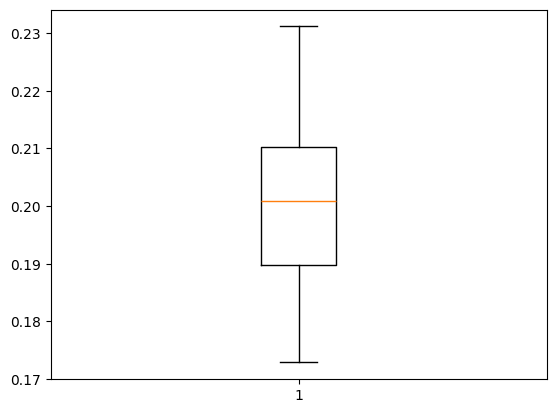

In [90]:
check_percent()

In [135]:
test = pd.read_csv(Path('..','popularity','test_5_last.csv'))
train = pd.read_csv(Path('..','popularity','train_5_last.csv'))

In [ ]:
test

,user_id,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,5.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,902,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,924,5.0,3.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,936,4.0,0.0,4.0,0.0,0.0,5.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
recommended = np.array([288, 257,   1, 258, 100, 294,   7, 237,  50, 181, 405, 151, 117, 121, 222, 127])
recommended_str = recommended.astype(str)
recommended_str
extract = test.loc[:,recommended_str]

In [157]:
test_np = test.to_numpy()
test_binary = (test_np != 0).astype(int)
sums = np.sum(test_binary, axis = 1)

extract_np = extract.to_numpy()
extract_binary = (extract_np != 0).astype(int)
extract_sum = np.sum(extract_binary, axis = 1)
np.mean(extract_sum / len(recommended))

0.4251994680851064

In [192]:
movies = pd.read_csv(Path('..','..','res','data','movies.csv'))
ratings = pd.read_csv(Path('..','..','res','data','ratings.csv'))

data_to_clustering = movies.drop(['release_date', 'video_release_date','IMDb_URL'], axis = 1)
data_to_clustering['title'] = data_to_clustering['title'].str.replace(r'\s\(\d{4}\)', '')
data_to_clustering.head()

,movie_id,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
def no_year(row):
    row['title'] = re.sub(r'\s\(\d{4}\)', '', row['title'])
    return row

In [177]:
data_to_clustering = data_to_clustering.apply(lambda row: no_year(row), axis = 1)

In [178]:
data_to_clustering

,movie_id,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wypyc\Desktop\inżynier

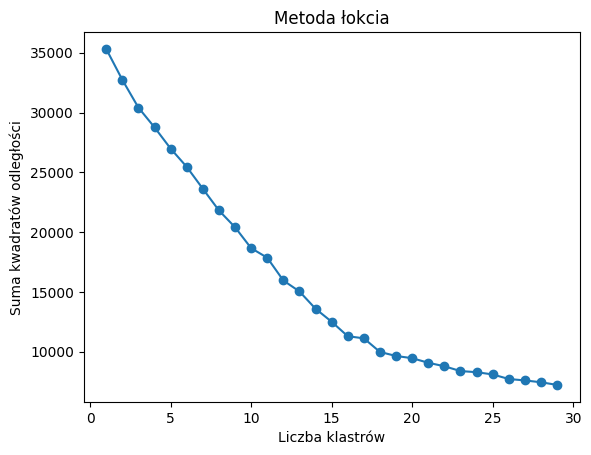

DataFrame po klasteryzacji:
      movie_id  title  unknown  Action  Adventure  Animation  Children's  \
0            1   1523        0       0          0          1           1   
1            2    616        0       1          1          0           0   
2            3    553        0       0          0          0           0   
3            4    591        0       1          0          0           0   
4            5    341        0       0          0          0           0   
...        ...    ...      ...     ...        ...        ...         ...   
1677      1678    951        0       0          0          0           0   
1678      1679    108        0       0          0          0           0   
1679      1680   1341        0       0          0          0           0   
1680      1681   1656        0       0          0          0           0   
1681      1682   1286        0       0          0          0           0   

      Comedy  Crime  Documentary  ...  Film-Noir  Horror  M

c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [194]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Przygotowanie danych do klasteryzacji
features = data_to_clustering  # Wybierz odpowiednie cechy

label_encoder = LabelEncoder()
features['title'] = label_encoder.fit_transform(features['title'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Wybór liczby klastrów - użyj metody łokcia
inertia = []
for n_clusters in range(1, 30):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Wykres metody łokcia
plt.plot(range(1, 30), inertia, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów odległości')
plt.title('Metoda łokcia')
plt.show()

# Wybierz optymalną liczbę klastrów
optimal_clusters = 15  # Załóżmy, że optymalna liczba klastrów wynosi 3

# Wykorzystaj algorytm k-means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_to_clustering['cluster'] = kmeans.fit_predict(features_scaled)

# Wyświetl DataFrame z przypisanymi klastrami
print("DataFrame po klasteryzacji:")
print(data_to_clustering)


In [200]:
merged = pd.merge(ratings, data_to_clustering[['movie_id','cluster']], how='left', on='movie_id')

In [201]:
merged

,user_id,movie_id,rating,timestamp,cluster
0,196,242,3,881250949,1
1,186,302,3,891717742,14
2,22,377,1,878887116,1
3,244,51,2,880606923,8
4,166,346,1,886397596,3
...,...,...,...,...,...
99995,880,476,3,880175444,1
99996,716,204,5,879795543,7
99997,276,1090,1,874795795,0
99998,13,225,2,882399156,1


In [203]:
data_to_clustering[data_to_clustering['movie_id'] == 302]['cluster']

301    14
Name: cluster, dtype: int32